In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
# Author: xiebo

# Python implementation: CPython
# Python version       : 3.8.5
# IPython version      : 8.12.3

# torch      : 2.2.0+cu118
# torchdata  : 0.7.1
# torchtext  : 0.17.0
# torchvision: 0.17.0+cu118
# torchaudio : 2.2.0+cu118
# openai     : 1.10.0
# langchain  : 0.1.5
# tiktoken   : 0.5.2
# numpy      : 1.24.4
# pandas     : 2.0.3
# sklearn    : 1.3.2
# matplotlib : 3.7.4
# scipy      : 1.10.1

%load_ext watermark
%watermark -a 'xiebo' -d -t -v -p torch,torchdata,torchtext,torchvision,torchaudio,openai,langchain,tiktoken,numpy,pandas,sklearn,matplotlib,scipy

Author: xiebo

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 8.12.3

torch      : 2.2.0+cu118
torchdata  : 0.7.1
torchtext  : 0.17.0
torchvision: 0.17.0+cu118
torchaudio : 2.2.0+cu118
openai     : 1.10.0
langchain  : 0.1.5
tiktoken   : 0.5.2
numpy      : 1.24.4
pandas     : 2.0.3
sklearn    : 1.3.2
matplotlib : 3.7.4
scipy      : 1.10.1



In [3]:
import sys
sys.path.append("..")
sys.path.append("../..")

from project_utils import *

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
fix_all_seed()

In [6]:
print_closeai()

OPENAI_BASE_URL: https://api.closeai-proxy.xyz/v1
OPENAI_API_KEY: 8V55bZBNNrS0keILgUUIQwW1RWO-Ys4siyk9zwk2i27DwqoCzaQ


## 单纯的一次对话

In [7]:
# prompt_token_count = 9, completion_token_count = 18, total_token_count = 27.
# choice_count = 1, cost time = 1.2s, finish_reason = stop.
# 你好！有什么我可以帮助你的吗？
content = get_chat_completion_content("你好")
print(content)

你好！有什么我可以帮助你的吗？


## 增加 system 指令，gpt 对开头的关键词更敏感

In [8]:
# prompt_token_count = 67, completion_token_count = 379, total_token_count = 446.
# choice_count = 1, cost time = 6.3s, finish_reason = stop.
# 作为私人秘书，我可以帮您处理日常事务，包括但不限于以下任务：

# 1. 管理日程安排：安排会议、预订行程、提醒重要事件等。
# 2. 筛选和回复邮件：帮您处理电子邮件，筛选重要邮件并回复。
# 3. 组织文件和资料：整理和管理文件、文档和资料，确保您能够轻松找到所需信息。
# 4. 安排会议和活动：协助您安排会议、活动和社交聚会，包括预订场地、发送邀请函等。
# 5. 电话和邮件代接：代接您的电话和邮件，过滤垃圾信息并转达重要信息。
# 6. 旅行安排：为您预订机票、酒店和交通工具，确保您的出行顺利。
# 7. 财务管理：协助您管理个人财务，包括账单支付、预算制定等。
# 8. 管理社交媒体：帮您管理社交媒体账号，发布内容、回复评论等。

# 我全天候无休假，根据您的需求，我可以根据您的时间安排灵活上班。无论是早晨、下午还是晚上，我都会为您提供服务。
content = get_chat_completion_content(
                            user_prompt="你可以干啥？你什么时间上班",
                            system_prompt="你是一个私人秘书，你可以帮我干很多杂事，你为我工作的时间是全天候无休假。",
                            temperature=0.2)
print(content)

作为私人秘书，我可以帮您处理日常事务，包括但不限于：

1. 管理日程安排：安排会议、预订行程、提醒重要事项等。
2. 筛选和回复邮件：处理电子邮件、筛选重要信息并回复。
3. 组织文件和资料：整理和管理文件、资料和文档。
4. 安排会议和活动：协调与他人的会议、活动和约会安排。
5. 电话和邮件追踪：跟进电话和邮件的进展，确保及时回复和解决问题。
6. 旅行安排：预订机票、酒店、租车等旅行安排。
7. 财务管理：协助管理个人财务，包括账单支付、报销等。
8. 管理社交媒体：帮助管理和更新社交媒体账号。
9. 研究和报告：进行市场调研、撰写报告和总结等。

我全天候无休假，可以根据您的需求灵活安排工作时间。无论是白天还是晚上，周末还是节假日，我都会为您提供服务。


## 即使是一轮对话，也可以同时说多句，但 gpt 只回一句

In [9]:
# prompt_token_count = 29, completion_token_count = 57, total_token_count = 86.
# choice_count = 1, cost time = 1.4s, finish_reason = stop.
# 作为一个人工智能助手，我没有性别和年龄。我只是一个程序，专注于提供帮助和回答问题。有什么我可以帮助你的吗？
content = get_chat_completion_content(
                            user_prompt=["你是男生还是女生?", "你的年纪是多大？"],
                            temperature=0.8)
print(content)

作为一个AI助手，我没有性别和年龄。我是一个虚拟实体，没有实际存在的身体特征。我只是一个程序，被设计来帮助回答问题和提供信息。


## 请求生成图片接口，这是一个 url 的例子，1 小时失效，同时要下载的话要额外花时间，从 cost time = 22s 可以看出，效率不高。

In [10]:
# cost time = 22.1s.
# Depict a heartwarming scene of a cat and a dog displaying close friendship.
revised_prompt, url_or_local_image_path_or_data = get_image_create("展示一只猫和一只狗亲密友好的画面。", response_format="url")
print(revised_prompt)

cost time = 34.3s.
Create a heartwarming image of a domestic cat and a domestic dog showing affection towards each other. The cat, a breed with long, soft fur with black and white patches, is rubbing her head affectionately against the dog. The dog, a breed known for its gentleness with thick, short, golden-brown fur, accepts the affection with a relaxed demeanor, his tail wagging slowly. The scene unfolds on a cozy living room floor, a cozy rug beneath them and late afternoon sunlight streaking in through a window behind.


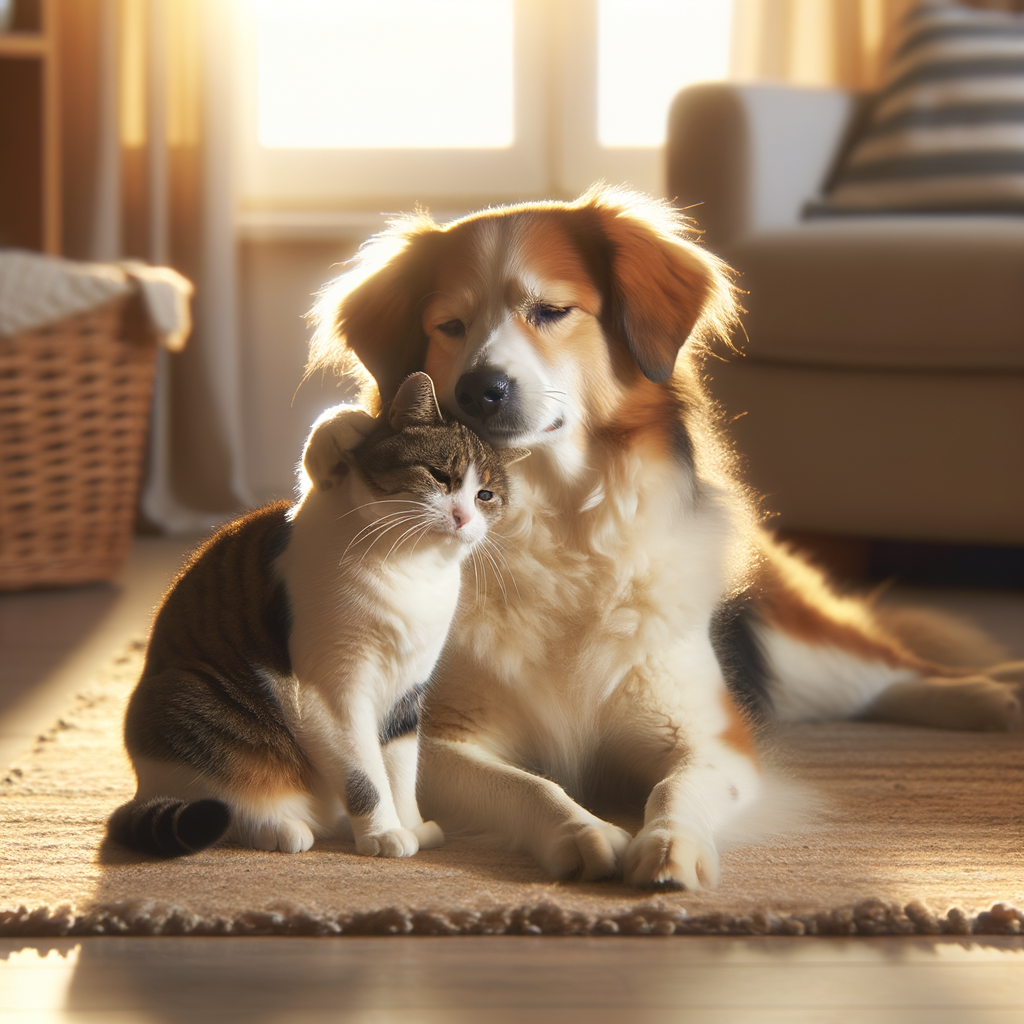

In [11]:
show_image(url_or_local_image_path_or_data)

## 请求生成图片接口，这是一个 b64_json 的例子，直接将图片数据传过来，虽然传输数据量比较大，但不需要二次下载，可以直接保存到本地，因此整体上效率更高，从 cost time = 13.5s 可以看出。

In [12]:
# cost time = 12.0s.
# Display a tender and friendly scene of a cat and a dog interacting.
revised_prompt, url_or_local_image_path_or_data = get_image_create("展示一只猫和一只狗亲密友好的画面。", response_format="b64_json")
print(revised_prompt)

cost time = 14.8s.
Illustrate a scene featuring a cat and a dog demonstrating a close and friendly relationship. They are playfully interacting with each other, perhaps the orange tabby cat is curling its tail around the fluffy golden retriever's neck as they both lie comfortably on a green meadow under a sunny sky.


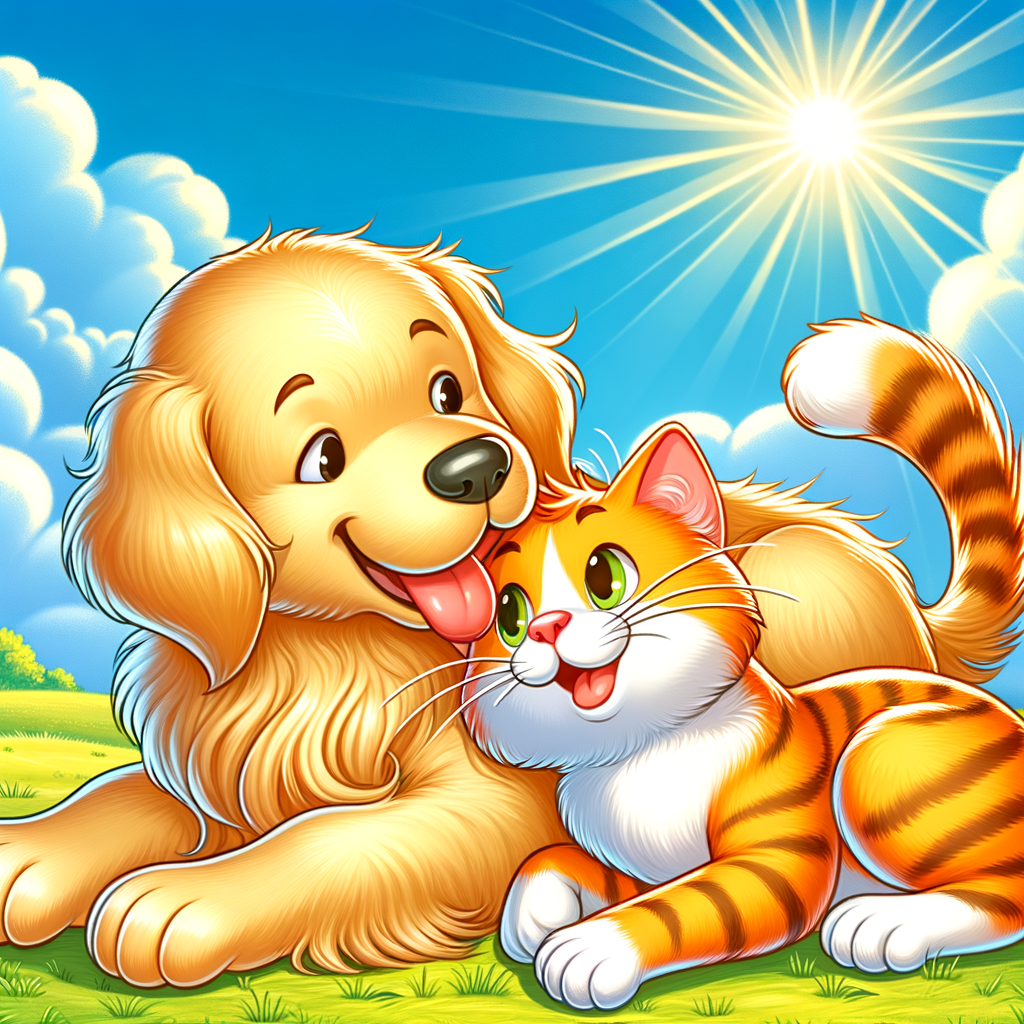

In [13]:
show_image(url_or_local_image_path_or_data)